### Лабораторная работа 3

**1. Отобразите выровненное по синхроимпульсу изображение снимка**

In [1]:
%pylab inline
from scipy.io import wavfile
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import numpy as np

######################## получение сигнала и частоты дискретизации 
sample_rate, data = wavfile.read('190422.wav')
data = np.array(data, dtype=float)
n_data = (data) / data.max()
sample_rate

Populating the interactive namespace from numpy and matplotlib


C:\Users\179D~1\AppData\Local\Temp/ipykernel_8592/1859304329.py:8: WavFileWarning: Reached EOF prematurely; finished at 9240620 bytes, expected 9240625 bytes from header.
  sample_rate, data = wavfile.read('190422.wav')


11025

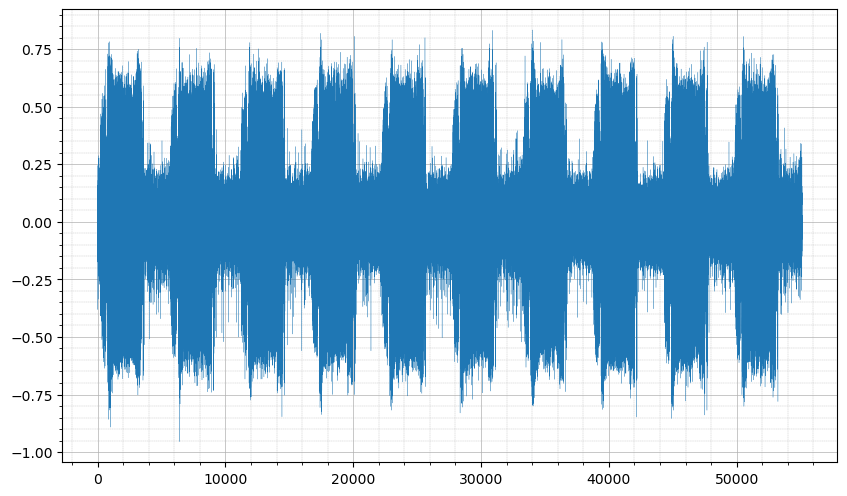

In [2]:
###### график сигнала
start, finish = 300, 305
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.plot(n_data[start * sample_rate : finish * sample_rate], linewidth=0.2)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

plt.show()

In [3]:
############################## амплитудная демодуляция
analytic_signal = hilbert(n_data)
amplitude_envelope = np.abs(analytic_signal)
print(amplitude_envelope[1000:1100])

[0.42869857 0.4028406  0.29576976 0.19035041 0.27127241 0.33056832
 0.34477844 0.46261    0.61151968 0.56121619 0.27621338 0.12337454
 0.36182789 0.46986365 0.45906303 0.43401975 0.46236636 0.50916067
 0.50905402 0.412413   0.31597693 0.27111154 0.21666672 0.36907222
 0.38305434 0.27479455 0.24252041 0.0974116  0.40538131 0.43988429
 0.16011319 0.3436762  0.3978034  0.52051966 0.41869573 0.26230137
 0.60482575 0.47459025 0.25247582 0.30331386 0.50522994 0.75762308
 0.57368023 0.16499426 0.41638861 0.38796801 0.40023488 0.5792122
 0.5619998  0.46495488 0.37037961 0.34072038 0.30801544 0.35319079
 0.36153857 0.31157123 0.10356556 0.36680622 0.74398343 0.67568919
 0.34973419 0.24377833 0.19012034 0.32569341 0.43352102 0.50199827
 0.60348924 0.59594263 0.38297499 0.02761588 0.29196139 0.43655464
 0.39509584 0.17906152 0.12682416 0.30035882 0.18925877 0.1293292
 0.3733162  0.36168785 0.13984364 0.06277685 0.10782565 0.32146152
 0.4042908  0.33976139 0.32114776 0.36685521 0.52879107 0.601440

In [4]:
print(len(amplitude_envelope))
matrix = np.array(amplitude_envelope[:838*5512]).reshape(int(len(amplitude_envelope) / 5512), 5512)
np.append(matrix, amplitude_envelope[838*5512:])
print(len(amplitude_envelope[838*5512:]))
print(matrix)

4620288
1232
[[0.03251991 0.32501924 0.71268196 ... 0.12899287 0.07061527 0.14442992]
 [0.34304584 0.51160265 0.46246634 ... 0.07551897 0.26524561 0.51595299]
 [0.58391883 0.40305385 0.24370733 ... 0.22821826 0.45119447 0.60071283]
 ...
 [0.24159309 0.0866858  0.2471889  ... 0.53430751 0.30594386 0.14975049]
 [0.30576367 0.2399438  0.13505497 ... 0.28953574 0.19523956 0.23942526]
 [0.31434963 0.20254454 0.2454484  ... 0.43813824 0.50809268 0.49636894]]


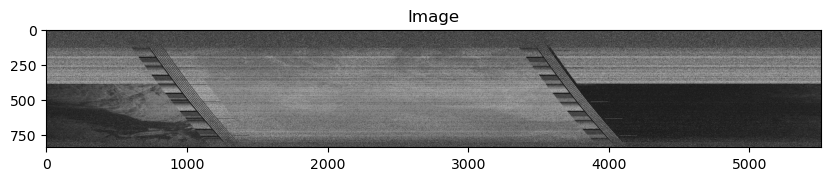

In [5]:
####### промежуточный результат изображения
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(matrix[:-1], cmap='gray')
plt.title('Image')
plt.show()

In [6]:
######### уменьшаем кол-во точек, чтобы на 1 пиксель было 1 значение
from scipy import signal
resampled_signal = signal.resample(amplitude_envelope, int(4160*(len(amplitude_envelope))/sample_rate))
resampled_signal /= resampled_signal.max()
print(len(resampled_signal))


1743346


39


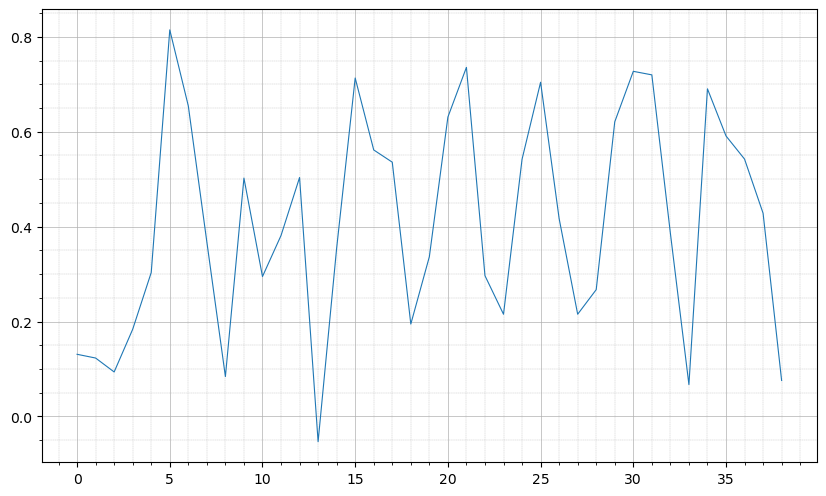

In [7]:
########################## находим синхроимпульс
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
mas = resampled_signal[1500000 + 15000 + 1500 + 100 + 25 + 8: 1530000 - 10000 - 2000 - 1200 - 100 - 30 + 2]
print(len(mas))
ax.plot(mas, linewidth=0.8)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

plt.show()

306
[[0.25919625 0.48524282 0.60943633 ... 0.14993381 0.184303   0.13605787]
 [0.35757222 0.45287214 0.47289985 ... 0.42007225 0.14942577 0.41135361]
 [0.39290986 0.57755747 0.43700989 ... 0.57842856 0.29598791 0.49328658]
 ...
 [0.37069533 0.34346379 0.30470656 ... 0.25762568 0.13336825 0.34258577]
 [0.17361675 0.48139825 0.42952588 ... 0.3089672  0.18322453 0.39687095]
 [0.31978301 0.32836208 0.36085877 ... 0.35558971 0.24629438 0.35389371]]


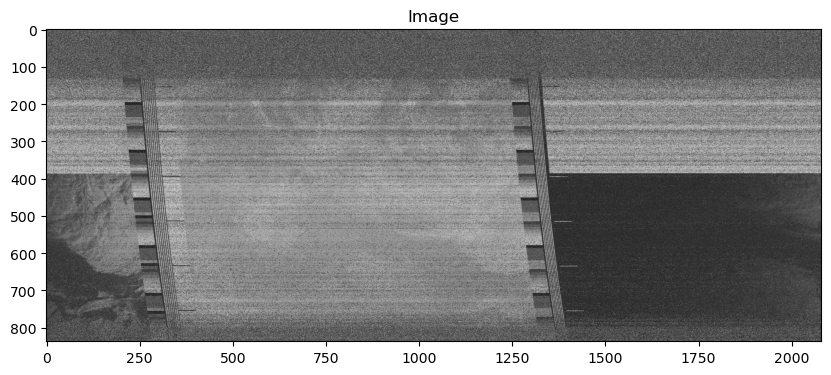

In [8]:
##### разбиваем матрицу на строки и строим изображение
matrix = np.array(resampled_signal[:2080*838]).reshape(int(len(resampled_signal) / 2080), 2080)
np.append(matrix, resampled_signal[838*2080:])
print(len(resampled_signal[838*2080:]))
print(matrix)

fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(matrix[:-1], cmap='gray')
plt.title('Image')
plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


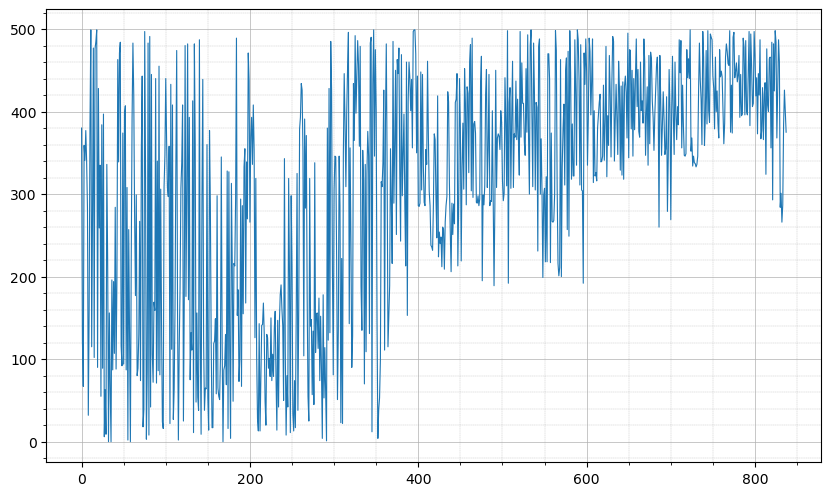

In [22]:
###################### поиск начала синхроимпульса
indexes = []
i = 0
ind = 0
while i < len(matrix):
    minind = []
    for ind in range(500):
        part = matrix[i][ind : ind + len(mas)]
        minind.append(abs((part - mas).mean()))
    indexes.append(np.array(minind).argmin())
    i += 1
    print(i)
        
indexes = np.array(indexes)

######### график полученных индексов начала синхроимпульса
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.plot(indexes, linewidth=0.8)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

plt.show()

246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273 11 10.9
274 20 10.8
275 30 10.700000000000001
276 40 10.600000000000001
277 50 10.500000000000002
278 60 10.400000000000002
279 70 10.300000000000002
280 80 10.200000000000003
281 90 10.100000000000003
282 100 10.000000000000004
283 110 9.900000000000004
284 117 9.800000000000004
285 126 9.700000000000005
286 135 9.600000000000005
287 144 9.500000000000005
288 153 9.400000000000006
289 162 9.300000000000006
290 171 9.200000000000006
291 180 9.100000000000007
292 189 9.000000000000007
293 198 8.900000000000007
294 200 8.800000000000008
295 208 8.700000000000008
296 216 8.600000000000009
297 224 8.500000000000009
298 232 8.40000000000001
299 240 8.30000000000001
300 248 8.20000000000001
301 256 8.10000000000001
302 264 8.00000000000001
303 272 7.900000000000011
304 273 7.800000000000011
305 280 7.700000000000012
306 287 7.600000000000012
307 294 7.500000000000012
308 301 7.4000

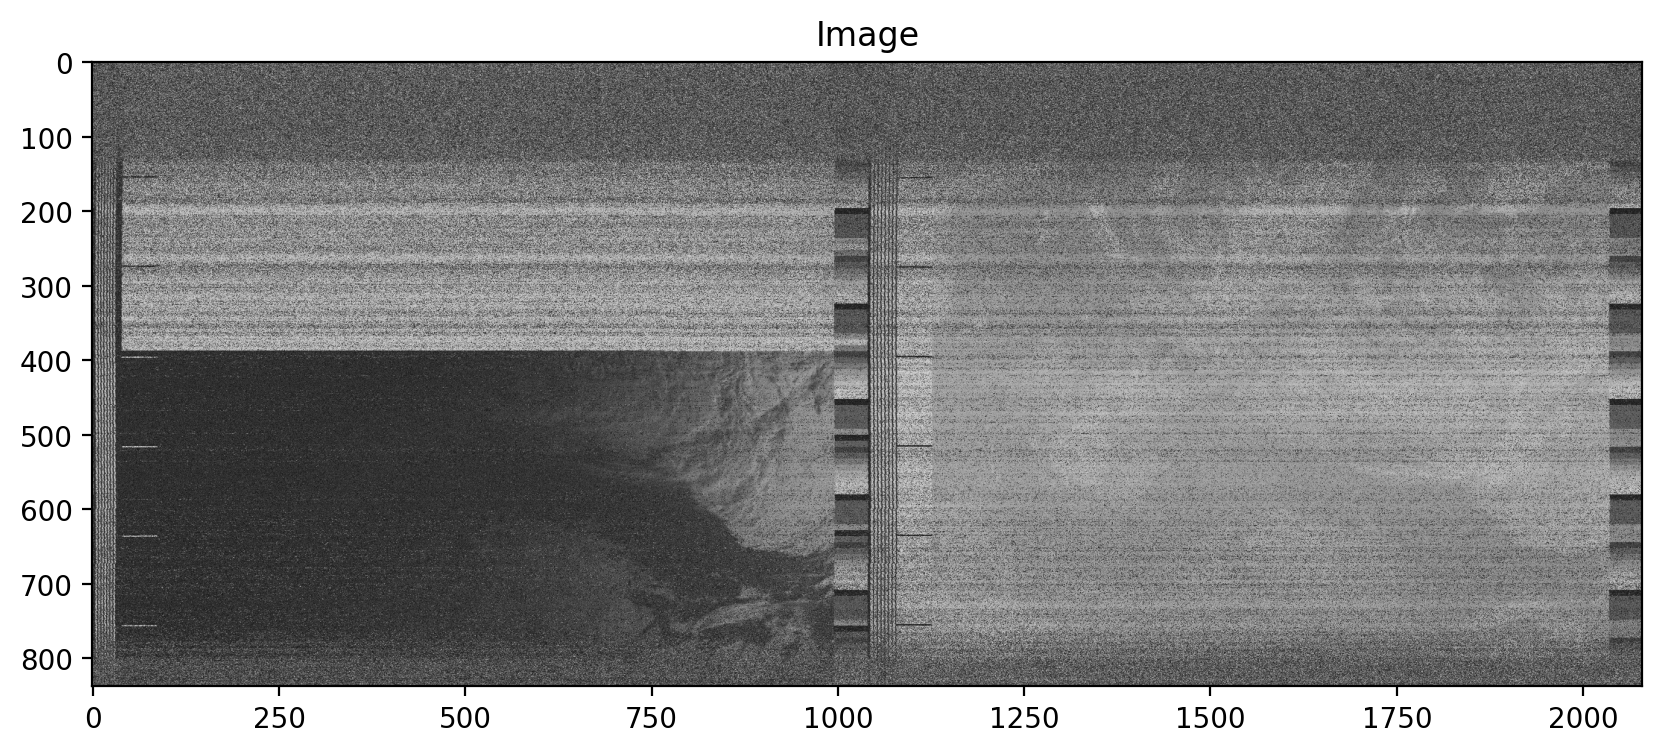

In [10]:
######################### построение изображения и синхронизация
matrix1 = np.copy(matrix)
indexmin = 245
for i in range(100):
    #print(i)
    m1 = np.copy(matrix1[i])
    for j in range(indexmin + 1040 + 1, 2080):
        matrix1[i][j - indexmin - 1040 - 1] = m1[j]
    for j in range(0, indexmin + 1040 + 1):
        matrix1[i][j + (2080 - (indexmin + 1040 + 1))] = m1[j]

counter = 1
for i in range(100, 400):
    #print(i)
    m1 = np.copy(matrix1[i])
    for j in range(indexmin + 1040 + 1, 2080):
        matrix1[i][j - indexmin - 1040 - 1] = m1[j]
    for j in range(0, indexmin + 1040 + 1):
        matrix1[i][j + (2080 - (indexmin + 1040 + 1))] = m1[j]
    if counter % 11 == 0:
        indexmin += 1
        print(indexmin)
    counter += 1

counter = 1
der = 11
for i in range(400, 750):
    #print(i)
    m1 = np.copy(matrix1[i])
    for j in range(indexmin + 1040 + 1, 2080):
        matrix1[i][j - indexmin - 1040 - 1] = m1[j]
    for j in range(0, indexmin + 1040 + 1):
        matrix1[i][j + (2080 - (indexmin + 1040 + 1))] = m1[j]
    if counter % int(der) == 0:
        indexmin += 1
        der -= 0.1
        print(indexmin, counter, der)
    counter += 1

counter = 1
for i in range(750, len(matrix1)):
    #print(i)
    m1 = np.copy(matrix1[i])
    for j in range(indexmin + 1040 + 1, 2080):
        matrix1[i][j - indexmin - 1040 - 1] = m1[j]
    for j in range(0, indexmin + 1040 + 1):
        matrix1[i][j + (2080 - (indexmin + 1040 + 1))] = m1[j]
    if counter % 7 == 0:
        indexmin += 1
        print(indexmin)
    counter += 1

matrix1 = np.array(matrix1)
fig, ax = plt.subplots(figsize=(10, 7), dpi=200)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(matrix1[:-1], cmap='gray')
plt.title('Image')
plt.show()

In [11]:
# Ваш код

**2. Выполните окрашивание левого канала изображения с использованием любой из палитр, представленных по ссылке: https://github.com/Xerbo/aptdec/tree/master/palettes. Отобразите результат**<br>
**_Может пригодиться функция `cv2.cvtColor()` ([описание из документации](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html))_**

In [12]:
import cv2

matrix2 = np.copy(matrix1)
cMap = cv2.imread("WXtoImg-N19-HVC.png", cv2.IMREAD_COLOR)

img = np.zeros((837, 2080, 3))
for i in range(837):
    for j in range(909):
        x, y = int(matrix2[i][85 + j] * 256) % 256, int(matrix2[i][85 + 1040 + j] * 256) % 256
        for c in range(3):
            img[i][j + 85][c] = cMap[x][y][c]
for i in range(837):
    for j in range(85):
        for c in range(3):
            img[i][j][c] = int(matrix2[i][j] * 256) % 256
    for j in range(995, 2080):
        for c in range(3):
            img[i][j][c] = int(matrix2[i][j] * 256) % 256

img /= 255
cv2.imshow('img', img)
cv2.waitKey()
img *= 255
cv2.imwrite("img.png", img)

True

**3. Запишите в переменные `start_latlon` и `end_latlon` проекции положений спутника NOAA-19 в моменты начала приема сигнала и конца в радианах, если локальные дата и время начала приема сигнала - 18 апреля 2022 года 18:30:N (МСК), где N - ваш номер по порядку в списке группы** 

In [13]:
#!pip install pyproj

In [15]:

from pyorbital.orbital import Orbital
from datetime import datetime, timedelta

sat = Orbital('NOAA 19')

start = datetime(2022, 4, 18, hour=15, minute=30, second=2)
end = start + timedelta(minutes=6, seconds=59)

print(sat.get_lonlatalt(start), sat.get_lonlatalt(end))

start_pos = np.array(sat.get_lonlatalt(start))
end_pos = sat.get_lonlatalt(end)

print(start_pos, end_pos)

start_latlon = np.deg2rad(start_pos[1]), np.deg2rad(start_pos[0])  # start_latlon = start_lat_rad, start_lon_rad
end_latlon = np.deg2rad(end_pos[1]), np.deg2rad(end_pos[0])    # end_latlon = end_lat_rad, end_lon_rad

(53.87169908405205, 42.395897480554346, 850.3543984387385) (39.406668819893916, 66.03617431745755, 858.9262101579885)
[ 53.87169908  42.39589748 850.35439844] (39.406668819893916, 66.03617431745755, 858.9262101579885)


In [ ]:
#!pip install pyshp

In [17]:
from scipy import interpolate
import shapefile


def draw(img):
    yaw = 0.
    vscale = 1
    hscale = 1

    # Compute the great-circle distance between two points
    # The units of all input and output parameters are radians
    def distance(lat1, lon1, lat2, lon2):
        # https://en.wikipedia.org/w/index.php?title=Great-circle_distance&oldid=749078136#Computational_formulas

        delta_lon = lon2 - lon1

        cos_central_angle = np.sin(lat1) * np.sin(lat2) + np.cos(lat1) * np.cos(lat2) * np.cos(delta_lon)
        
        if cos_central_angle < -1:
            cos_central_angle = -1
        
        if cos_central_angle > 1:
            cos_central_angle = 1

        return np.arccos(cos_central_angle)

    height = len(img)

    y_res = distance(*start_latlon, *end_latlon) / height / vscale
    x_res = 0.0005 / hscale

    # Compute azimuth of line between two points
    # The angle between the line segment defined by the points (`lat1`,`lon1`) and (`lat2`,`lon2`) and the North
    # The units of all input and output parameters are radians
    def azimuth(lat1, lon1, lat2, lon2):
        # https://en.wikipedia.org/w/index.php?title=Azimuth&oldid=750059816#Calculating_azimuth

        delta_lon = lon2 - lon1

        return np.arctan2(np.sin(delta_lon), np.cos(lat1) * np.tan(lat2) - np.sin(lat1) * np.cos(delta_lon))

    ref_az = azimuth(*start_latlon, *end_latlon)

    def latlon_to_rel_px(latlon):
        az = azimuth(*start_latlon, *latlon)
        B = az - ref_az

        c = distance(*latlon, *start_latlon)

        if c < -np.pi / 3:
            c = -np.pi / 3
        
        if c > np.pi / 3:
            c = np.pi / 3

        a = np.arctan(np.cos(B) * np.tan(c))
        b = np.arcsin(np.sin(B) * np.sin(c))

        x = -b / x_res

        # Add the yaw correction value
        # Should be calculating sin(yaw) * x but yaw is always a small value
        y = a / y_res + yaw * x

        return (x, y)

    def draw_line(latlon1, latlon2, r, g, b, a):
        # Convert latlon to (x, y)
        (x1, y1) = latlon_to_rel_px(latlon1)
        (x2, y2) = latlon_to_rel_px(latlon2)

        f = interpolate.interp1d((x1, x2), (y1, y2))
        xar = np.arange(x1, x2)
        if (x1 > -456. and x1 < 456. and y1 > 0. and y1 < height) or (x1 > -600. and x1 < 600. and y1 > 0. and y1 < height):
            for x in xar:
                y = f(x)
                if x > -456 and x < 456 and y > 0 and y < height:
                    img[int(y), int(x) + 539] = [r, g, b]
                    img[int(y), int(x) + 1579] = [r, g, b]

    def draw_shape(shpfile, r, g, b):
        reader = shapefile.Reader(shpfile)
        for shape in reader.shapes():
            prev_pt = shape.points[0]
            for pt in shape.points:
                draw_line(
                    (pt[1] / 180. * np.pi, pt[0] / 180. * np.pi),
                    (prev_pt[1] / 180. * np.pi, prev_pt[0] / 180. * np.pi),
                    r, g, b, 0
                );
                prev_pt = pt;

    draw_shape("https://github.com/nvkelso/natural-earth-vector/blob/master/10m_cultural/ne_10m_admin_0_countries.shp?raw=true", 255, 255, 0)
    return img

**4. Выполните функцию `draw()`, передав в нее в качестве аргумента копию вашего окрашенного изображения. Результат выполнения (новое изображение) отобразите**

Функция `draw()` нанесет на левый канал вашего изображения контуры стран в соотвествии с вычисленными вами в п.3 `start_latlon` и `end_latlon`

In [18]:
# Ваш код
img = draw(img)
imwritten = cv2.imwrite("newimg.png", img)
cv2.imshow('img', img/255)
cv2.waitKey()

-1

**5. Сохраните окрашенное изображение с нанесенными на него контурами стран в файл. Обратите внимание, что не следует сохранять излишние данные - синхроимпульсы, минутные метки, телеметрию и данные второго канала**

In [19]:
img = img[:, 85:85 + 909]
imwritten = cv2.imwrite("finalimg.png", img)
cv2.imshow('finalimg', img/255)
cv2.waitKey()
# Ваш код

-1

**6. Вычислите и выведите две опорные точки в формате:**

`ImgX_1    ImgY_1    MapX_1    MapY_1`<br>
`ImgX_2    ImgY_2    MapX_2    MapY_2`


`ImgX_1, ImgY_1` - координаты центра первой принятой линии в пикселях;<br>
`ImgX_2, ImgY_2` - координаты центра последней принятой линии в пикселях;<br>
`MapX_1, MapY_1` - координаты карты, соответствующие `ImgX_1, ImgY_1` в метрах;<br>
`MapX_2, MapY_2` - аналогично.<br>
Напоминаю, что начало координат "пискельной" системы координат изображения находится в левом верхнем углу, ось Х направлена вправо, Y - вверх.<br>
Также напоминаю, что для рендеринга карт в Google Maps, OpenStreetMap и т.д. используется проецируемая система координат [WGS 84 / Pseudo-Mercator -- Spherical Mercator](https://epsg.io/3857).<br>
Для вычисления координат карты в метрах рекомендую использовать метод `from_crs()` класса `Transformer` модуля `pyproj`.

Результат сохраните в текстовый файл для дальнейшего использования в ArcGIS.

In [28]:
# Ваш код
from pyproj import CRS
from pyproj import Transformer


proj = Transformer.from_crs(4326, 3857, always_xy=True)
start_pos1 = proj.transform(start_pos[0], start_pos[1])
end_pos1 = proj.transform(end_pos[0], end_pos[1])
print(start_pos1)
print(end_pos1)

(5996970.110205136, 5220468.690455602)
(4386730.306889761, 9886753.448594036)


**Дальнейшая работа выполняется в ArcGIS**

**7. Осуществите географическую привязку изображения, полученного в результате выполнения п.5, с использованием текстового файла из п.6**

**8. Дополните опорные точки вручную**

**9. Сохраните в папку на вашем google диске ноутбук, текстовый файл и скриншот работы, выполненной в ArcGIS. На скриншоте должны быть видны привязанное изображение, а также таблица опорных точек**